<a href="https://colab.research.google.com/github/Nimo160302/Deep_Learning_Codes/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
'''Q-1. Compare the Loss functions [5marks]
Train a single-layer neural network using:

Mean Squared Error (MSE) for regression

Binary Cross Entropy (BCE) for classification

Dataset:
Use make_regression for regression

Use make_classification for binary classification

Instructions:
Implement a single neuron (no hidden layers)

Use sigmoid activation only for classification

Use no activation for regression

Train using gradient descent

Plot loss vs. epochs for both cases'''

'Q-1. Compare the Loss functions arks]\nTrain a single-layer neural network using:\n\nMean Squared Error (MSE) for regression\n\nBinary Cross Entropy (BCE) for classification\n\nDataset:\nUse make_regression for regression\n\nUse make_classification for binary classification\n\nInstructions:\nImplement a single neuron (no hidden layers)\n\nUse sigmoid activation only for classification\n\nUse no activation for regression\n\nTrain using gradient descent\n\nPlot loss vs. epochs for both cases'

In [203]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression, make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,  log_loss

In [204]:
X, y = make_regression(n_samples=100, n_features=100, noise=1, random_state=42)
y  = y.reshape(-1, 1 )

In [205]:
X.shape

(100, 100)

In [206]:
y.shape

(100, 1)

In [207]:
x_train, x_test, y_train, y_test  =  train_test_split(X, y, test_size =  0.2)

In [208]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(80, 100) (80, 1) (20, 100) (20, 1)


In [209]:
input_size  =  100
output_size  = 1
epochs = 100
lr  = 0.1


w = np.random.uniform(0, 1, (input_size, output_size))
b = np.array([[1]])

In [210]:
w

array([[0.9642684 ],
       [0.40103323],
       [0.82003226],
       [0.04035312],
       [0.77726742],
       [0.51310063],
       [0.76282222],
       [0.42230843],
       [0.31565444],
       [0.96147207],
       [0.68932587],
       [0.69937146],
       [0.64621124],
       [0.7837144 ],
       [0.09130298],
       [0.51098084],
       [0.59828154],
       [0.3651717 ],
       [0.37093014],
       [0.79802442],
       [0.22143153],
       [0.62097701],
       [0.17661724],
       [0.88005911],
       [0.2631644 ],
       [0.86374153],
       [0.44494518],
       [0.48100787],
       [0.35488556],
       [0.37046754],
       [0.97499138],
       [0.01488589],
       [0.05894809],
       [0.59847491],
       [0.18675324],
       [0.39237088],
       [0.04698042],
       [0.27378231],
       [0.18723041],
       [0.84793844],
       [0.66600822],
       [0.23558844],
       [0.21664112],
       [0.70113937],
       [0.74328575],
       [0.62892191],
       [0.80112677],
       [0.890

In [211]:
b

array([[1]])

In [212]:
def train_model(x, w , b):
  loss_arr  =[]

  for i in range(epochs):
    #forward pass equation
    y_pred = np.dot(x,w) + b

    #loss

    loss =  1/2*np.mean((y_pred - y_train)**2)
    d_loss =  (y_pred - y_train)/y_train.shape[0]

    #back proppogation


    w = w - lr* (np.dot(x.T, d_loss))
    b =  b - lr* (np.sum(d_loss , axis  = 0 , keepdims= True))


    loss_arr.append(loss)

  return w, b, loss_arr

In [213]:
w , b, loss_arr  = train_model(x_train , w, b)

In [214]:
# w

In [215]:
b

array([[5.83532294]])

In [216]:
len(loss_arr)

100

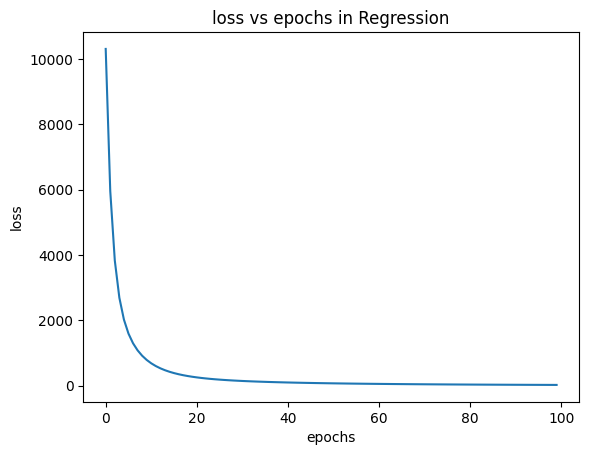

In [217]:
plt.plot(loss_arr)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('loss vs epochs in Regression')
plt.show()

In [218]:
y_train.reshape(-1, 1).shape

(80, 1)

In [219]:
from sklearn.datasets import make_classification

In [220]:
x , y   =  make_classification(random_state= 42)

In [221]:
x.shape

(100, 20)

In [222]:
y.shape

(100,)

In [223]:
y  =  y.reshape(-1, 1)

In [224]:
y.shape

(100, 1)

In [225]:
x_train , x_test, y_train , y_test = train_test_split(x, y, test_size =0.2)

In [226]:
print(x_train.shape, y_train.shape , x_test.shape , y_test.shape)

(80, 20) (80, 1) (20, 20) (20, 1)


In [227]:
w  =  np.random.uniform(0 , 1 , size = (x_train.shape[1], 1))

In [228]:
w.shape
epochs  = 100

def sigmoid(x):
    exp_x  =  np.exp(-x)
    act = 1/(1+ exp_x)
    deriv =  act*(1-act)

    return (act , deriv)

In [229]:

def train_classi(w, b , x):

  loss_arr_classification =  []

  for i in range(epochs):

    #forward pass
    z  =  np.dot(x, w) + b
    act , deriv = sigmoid(z)
    y_pred  =  act

    #loss
    loss  =  -np.mean(y_train*np.log(y_pred+ 1e-8) + (1-y_train)*np.log(1-y_pred + 1e-8))
    loss_arr_classification.append(loss)

    dloss_dy_pred  =  (y_pred - y_train) / y_train.shape[0]


    dw = np.dot(x.T, dloss_dy_pred)
    db = np.sum(dloss_dy_pred, axis=0, keepdims=True)



    #back_propogation

    w   = w  - lr* dw
    b =  b - lr* db

  return w, b, loss_arr_classification



In [230]:
w, b, arr  = train_classi(w, b, x_train)

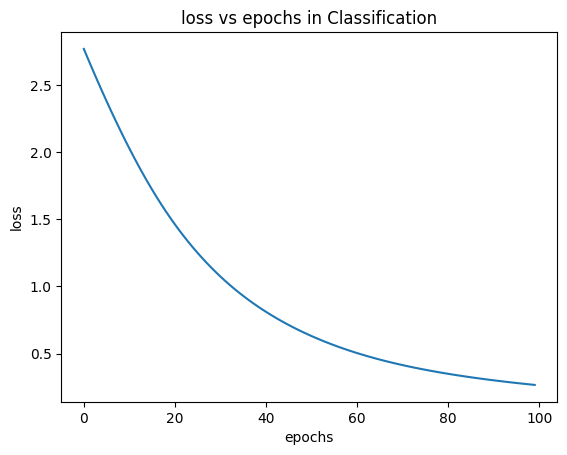

In [231]:
plt.plot(arr)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('loss vs epochs in Classification')
plt.show()

## Q-2. Compare the Learning Rate Effects

In [232]:
x, y = make_classification(
    n_samples=200,n_features=2, n_informative=2, n_redundant=0,  n_clusters_per_class=1, n_classes=2,random_state=42 )

In [233]:
x.shape

(200, 2)

In [234]:
y.shape

(200,)

In [235]:
y  = y.reshape(-1, 1)
y.shape

(200, 1)

In [236]:
x_train , x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2)

In [237]:
print(x_train.shape,y_train.shape, x_test.shape,   y_test.shape)

(160, 2) (160, 1) (40, 2) (40, 1)


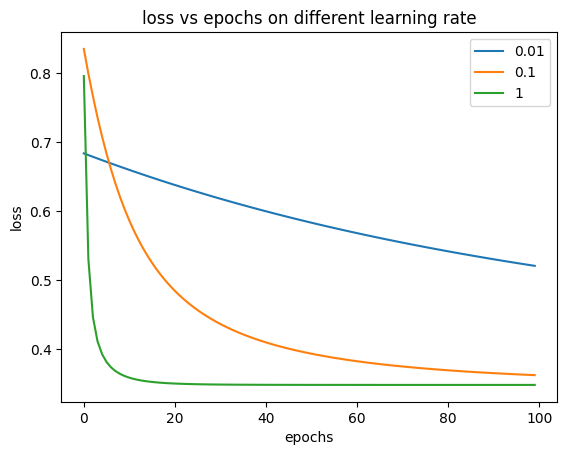

In [238]:
lr_rate  = [0.01,0.1,1]

for lr in (lr_rate):

  w  = np.random.uniform(0, 1, size =  (x_train.shape[1], 1))
  b =  np.array([[1]])

  w, b, loss_arr  = train_classi(w, b, x_train)
  plt.plot(loss_arr , label =f'learning_rate:{lr}')
  plt.xlabel('epochs')
  plt.ylabel('loss')

plt.title('loss vs epochs on different learning rate')
plt.legend(lr_rate)
plt.show()




In [241]:
!jupyter nbconvert --to html /25DLS304.ipynb

[NbConvertApp] Converting notebook /25DLS304.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 425775 bytes to /25DLS304.html
